In [527]:
import numpy as np
import random



def get_state_obstacle(x, y):
    if y == 5:
        up = 1
    elif W[x][y + 1] == 1:
        up = 1
    else:
        up = 0
    if y == 0:
        down = 1
    elif W[x][y - 1] == 1:
        down = 1
    else:
        down = 0
    if x == 0:
        left = 1
    elif W[x - 1][y] == 1:
        left = 1
    else:
        left = 0
    if x == 24:
        right = 1
    elif W[x + 1][y] == 1:
        right = 1
    else:
        right = 0
    
    return int(up * 8 + down * 4 + left * 2 + right)



def random_sidewalk(x, y):
    W = np.zeros((x, y))
    o_list = []
    for i in range(1, x):
        for j in range(y):
            temp = random.randint(1, 5)
            if temp == 1:
                W[i][j] = 1
                o_list.append([i, j])
    return W, o_list
    
def R_generation(s, a):
    R = np.zeros((s, a))
    for i in range(s):
        temp = i
        for j in range(a):
            dire = temp % 2 #right left down up
            if dire == 1:
                R[i][3 - j] -= 10
            else:
                if j == 0:
                    R[i][3 - j] += 3.5
                if j == 1:
                    R[i][3 - j] -= 2.5
            temp = int(temp / 2)
    return R
        
        
        
# Initialize matrix Q to zero
m = 6
n = 25

s = 2 * 2 * 2 * 2
a = 4


W, o_list = random_sidewalk(n, m)
R = R_generation(s, a)
R_obstacle = R
print(R)

[[   0.     0.    -2.5    3.5]
 [   0.     0.    -2.5 -100. ]
 [   0.     0.  -100.     3.5]
 [   0.     0.  -100.  -100. ]
 [   0.  -100.    -2.5    3.5]
 [   0.  -100.    -2.5 -100. ]
 [   0.  -100.  -100.     3.5]
 [   0.  -100.  -100.  -100. ]
 [-100.     0.    -2.5    3.5]
 [-100.     0.    -2.5 -100. ]
 [-100.     0.  -100.     3.5]
 [-100.     0.  -100.  -100. ]
 [-100.  -100.    -2.5    3.5]
 [-100.  -100.    -2.5 -100. ]
 [-100.  -100.  -100.     3.5]
 [-100.  -100.  -100.  -100. ]]


In [52]:
import matplotlib.pyplot as plt

def plot_sidewalk(o_list):
    plt.figure(figsize = (10, 2))
    for i in o_list:
        plt.plot(i[0], i[1], 'ro')
    plt.axis([-1, n, -1, m])
    plt.xticks(np.arange(-1, n, 1))
    plt.yticks(np.arange(-1, m, 1))
    plt.plot(range(0, n), np.zeros(n), color='black')
    plt.plot(np.zeros(m), range(0, m), color='black')
    plt.plot(range(0, n), np.full(n, m - 1), color='black')
    plt.plot(np.full(m, n - 1), range(0, m), color='black')
    plt.grid(True)
    plt.show()

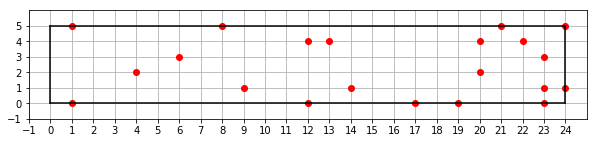

In [55]:
plot_sidewalk(o_list)

In [69]:
epsilon = 0.1
alpha = 0.5
gamma = 0.9

In [440]:
directions = [[0, 1], [0, -1], [-1, 0], [1, 0]]

def epsilon_greedy(x, y, s, Q):
    if random.random() < epsilon:
        # randomly pick an a
        a_x, a_y, a = rand_helper(x, y)
        while a_x < 0 or a_x > n - 1 or a_y <0 or a_y > m - 1:
            a_x, a_y, a = rand_helper(x, y)
    else:
        maxQ = -float("inf")
        a_x = x
        a_y = y
        a = -1
        for i in range(4):
            temp_x = x + directions[i][0]
            temp_y = y + directions[i][1]
            if temp_x >= 0 and temp_x <= n - 1 and temp_y >= 0 and temp_y <= m - 1:
                temp_Q = Q[s][i]
                if maxQ < temp_Q:
                    maxQ = temp_Q
                    a_x = temp_x
                    a_y = temp_y
                    a = i
    return a_x, a_y, a
                
        
    
def rand_helper(x, y):        
    ran = random.randint(0, 3)
    a_x = x + directions[ran][0]
    a_y = y + directions[ran][1]
    return a_x, a_y, ran


In [441]:
import matplotlib.pyplot as plt
#each episode
def Q_learning(init_x, init_y, Q):
    #randomly select an initial state among the whole map
    x = init_x
    y = init_y    
    s = get_state_obstacle(x, y)
    path = []
    for i in range(1000):
        x, y, s, path = Q_update(x, y, s, path, Q)
        if x == 24:
            break
    #normalize the matrix Q
    Q = normalizeRows(Q)
    return path
        

def Q_update(x, y, s, path, Q):
    if x == 24:
        return
    #using the epsilon-greedy strategy to pick an action a
    a_x, a_y, a = epsilon_greedy(x, y, s, Q)        

    #using action a to determine next state s’.
    sp = get_state_obstacle(a_x, a_y)

    #update Q value: Q(s,a) = (1 − α) * Q(s, a) + α * (R(x, y,a) + γ * max(Q(s′,:)));
    maxQp = -float("inf")
    for i in range(4):
        if Q[sp][i] > maxQp:
            maxQp = Q[sp][i]
    Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R[s][a] + gamma * maxQp)
    
    #set the next state as the current state.
    s = sp
    path.append([[x, y], [a_x, a_y]])
    return a_x, a_y, s, path

def normalizeRows(M):
    row_sums = M.sum(axis=1)
    for i in range(len(row_sums)):
        if row_sums[i] != 0:
            M[i] /= row_sums[i]
    return M

In [458]:
def plot_path(path):
    plt.figure(figsize = (10, 2))
    for i in o_list:
        plt.plot(i[0], i[1], 'ro', label="Obstacles")
    for i in range(len(path)):
        p = path[i]
        plt.plot([p[0][0], p[1][0]], [p[0][1], p[1][1]], 'b-', label="Path")
        #plt.scatter([p[0][0], p[1][0]], [p[0][1], p[1][1]], color='b', s = 10 )
    plt.axis([-1, n, -1, m])
    plt.xticks(np.arange(-1, n, 1))
    plt.yticks(np.arange(-1, m, 1))
    plt.plot(range(0, n), np.zeros(n), color='black')
    plt.plot(np.zeros(m), range(0, m), color='black')
    plt.plot(range(0, n), np.full(n, m - 1), color='black')
    plt.plot(np.full(m, n - 1), range(0, m), color='black')
    plt.grid(True)

    #plt.title("Obstacle-only Learning")
    plt.title("Litter-only Learning")
    plt.show()

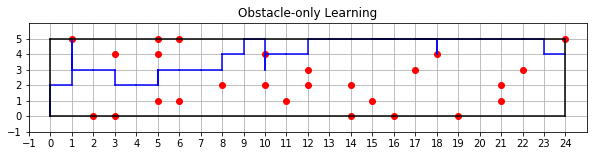

In [448]:
s = 2 * 2 * 2 * 2
a = 4
Q_obstacle = np.zeros((s, a))
path = Q_learning(0, random.randint(0, m - 1), Q_obstacle)
plot_path(path)

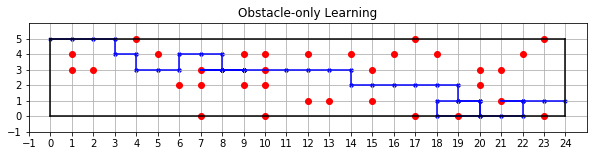

In [167]:
plot_path(path)

In [528]:
#Train the model
s = 2 * 2 * 2 * 2
a = 4
Q_obstacle = np.zeros((s, a))
for episode in range(20000):
    x = random.randint(0, n - 2)#anywhere but the terminal
    y = random.randint(0, m - 1)
    W, o_list = random_sidewalk(n, m)
    Q_learning(x, y, Q_obstacle)

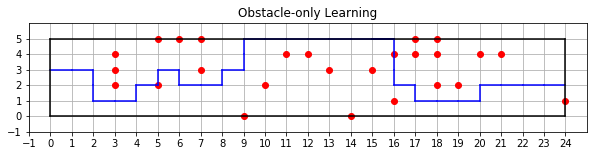

In [453]:
#Give a demo
W, o_list = random_sidewalk(n, m)
path = Q_learning(0, random.randint(0, m - 1), Q_obstacle)
plot_path(path)

In [454]:
def Q_learning_pickup(init_x, init_y, Q, W):
    #randomly select an initial state among the whole map
    x = init_x
    y = init_y    
    s = get_state_litter(x, y)
    path = []
    for i in range(1000):
        #picking up
        if W[x][y] == 1:
            W[x][y] = 0
        x, y, s, path = Q_update_litter(x, y, s, path, Q)       
        if x == 24:
            break
    #normalize the matrix Q
    Q = normalizeRows(Q)
    return path

def Q_update_litter(x, y, s, path, Q):
    if x == 24:
        return
    #using the epsilon-greedy strategy to pick an action a
    a_x, a_y, a = epsilon_greedy(x, y, s, Q)        

    #using action a to determine next state s’.
    sp = get_state_litter(a_x, a_y)

    #update Q value: Q(s,a) = (1 − α) * Q(s, a) + α * (R(x, y,a) + γ * max(Q(s′,:)));
    maxQp = -float("inf")
    for i in range(4):
        if Q[sp][i] > maxQp:
            maxQp = Q[sp][i]
    Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R[s][a] + gamma * maxQp)
    
    #set the next state as the current state.
    s = sp
    path.append([[x, y], [a_x, a_y]])
    return a_x, a_y, s, path

In [529]:
#Pick up litter

def R_litter(s, a):
    R = np.zeros((s, a))
    for i in range(s):
        temp = i
        for j in range(a):
            dire = temp % 2 #right left down up
            if dire == 1:
                R[i][3 - j] += 100
            else:
                if j == 0:
                    R[i][3 - j] += 3.5
                if j == 1:
                    R[i][3 - j] -= 2.5
            temp = int(temp / 2)
    return R

def get_state_litter(x, y):
    if y == 5:
        up = 0
    else:
        up = W[x][y + 1]
    if y == 0:
        down = 0
    else:
        down = W[x][y - 1]
    if x == 0:
        left = 0
    else:
        left = W[x - 1][y]
    if x == 24:
        right = 0
    else:
        right = W[x + 1][y]
    
    return int(up * 8 + down * 4 + left * 2 + right)

 
s = 2 * 2 * 2 * 2
a = 4
R = R_litter(s, a)
R_lit = R
Q_litter = np.zeros((s, a))

for episode in range(20000):
    x = random.randint(0, n - 2)#anywhere but the terminal
    y = random.randint(0, m - 1)
    W, o_list = random_sidewalk(n, m)
    Q_learning_pickup(x, y, Q_litter, W)

In [605]:
print(R_lit)

[[  0.    0.   -2.5   3.5]
 [  0.    0.   -2.5 100. ]
 [  0.    0.  100.    3.5]
 [  0.    0.  100.  100. ]
 [  0.  100.   -2.5   3.5]
 [  0.  100.   -2.5 100. ]
 [  0.  100.  100.    3.5]
 [  0.  100.  100.  100. ]
 [100.    0.   -2.5   3.5]
 [100.    0.   -2.5 100. ]
 [100.    0.  100.    3.5]
 [100.    0.  100.  100. ]
 [100.  100.   -2.5   3.5]
 [100.  100.   -2.5 100. ]
 [100.  100.  100.    3.5]
 [100.  100.  100.  100. ]]


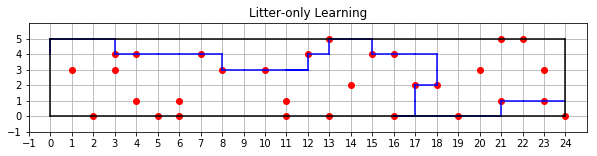

In [461]:
W, o_list = random_sidewalk(n, m)
path = Q_learning_pickup(0, random.randint(0, m - 1), Q_litter, W)
plot_path(path)

In [530]:
# Go down the sidewalk
def R_godown(s, a):
    R = np.zeros((s, a))
    for i in range(s):
        temp = i
        for j in range(a):
            dire = temp % 2 #right left down up
            if dire == 1 and j == 0:
                R[i][3 - j] += 100
            else:
                if j == 0:
                    R[i][3 - j] += 3.5
                if j == 1:
                    R[i][3 - j] -= 2.5
                if j > 1:
                    R[i][3 - j] -= 1
            temp = int(temp / 2)
    return R

def get_state_godown(x, y):
    up = 0
    down = 0
    left = 0
    if x >= 23:
        right = 1
    else:
        right = 0
    
    return int(up * 8 + down * 4 + left * 2 + right)

def Q_learning_godown(init_x, init_y, Q):
    #randomly select an initial state among the whole map
    x = init_x
    y = init_y    
    s = get_state_godown(x, y)
    path = []
    for i in range(1000):
        x, y, s, path = Q_update(x, y, s, path, Q)
        if x == 24:
            break
    #normalize the matrix Q
    Q = normalizeRows(Q)
    return path
        
def Q_update_godown(x, y, s, path, Q):
    if x == 24:
        return
    #using the epsilon-greedy strategy to pick an action a
    a_x, a_y, a = epsilon_greedy(x, y, s, Q)        

    #using action a to determine next state s’.
    sp = get_state_godown(a_x, a_y)

    #update Q value: Q(s,a) = (1 − α) * Q(s, a) + α * (R(x, y,a) + γ * max(Q(s′,:)));
    maxQp = -float("inf")
    for i in range(4):
        if Q[sp][i] > maxQp:
            maxQp = Q[sp][i]
    Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R[s][a] + gamma * maxQp)
    
    #set the next state as the current state.
    s = sp
    path.append([[x, y], [a_x, a_y]])
    return a_x, a_y, s, path

s = 2 * 2 * 2 * 2
a = 4
R = R_godown(s, a)
R_god = R
Q_godown = np.zeros((s, a))

for episode in range(20000):
    x = random.randint(0, n - 2)#anywhere but the terminal
    y = random.randint(0, m - 1)
    W, o_list = random_sidewalk(n, m)
    Q_learning_godown(x, y, Q_godown)

In [606]:
print(R_god)

[[ -1.   -1.   -2.5   3.5]
 [ -1.   -1.   -2.5 100. ]
 [ -1.   -1.   -2.5   3.5]
 [ -1.   -1.   -2.5 100. ]
 [ -1.   -1.   -2.5   3.5]
 [ -1.   -1.   -2.5 100. ]
 [ -1.   -1.   -2.5   3.5]
 [ -1.   -1.   -2.5 100. ]
 [ -1.   -1.   -2.5   3.5]
 [ -1.   -1.   -2.5 100. ]
 [ -1.   -1.   -2.5   3.5]
 [ -1.   -1.   -2.5 100. ]
 [ -1.   -1.   -2.5   3.5]
 [ -1.   -1.   -2.5 100. ]
 [ -1.   -1.   -2.5   3.5]
 [ -1.   -1.   -2.5 100. ]]


In [480]:
def plot_path_only(path):
    plt.figure(figsize = (10, 2))
    #for i in o_list:
        #plt.plot(i[0], i[1], 'ro', label="Obstacles")
    for i in range(len(path)):
        p = path[i]
        plt.plot([p[0][0], p[1][0]], [p[0][1], p[1][1]], 'b-')
        #plt.scatter([p[0][0], p[1][0]], [p[0][1], p[1][1]], color='b', s = 10 )
    #for i in range(m):
        #plt.scatter([24], [i], 'ro')
    plt.axis([-1, n, -1, m])
    plt.xticks(np.arange(-1, n, 1))
    plt.yticks(np.arange(-1, m, 1))
    plt.plot(range(0, n), np.zeros(n), color='black')
    plt.plot(np.zeros(m), range(0, m), color='black')
    plt.plot(range(0, n), np.full(n, m - 1), color='black')
    plt.plot(np.full(m, n - 1), range(0, m), color='black')
    plt.grid(True)

    plt.title("Staying in Sidewalk Learning")
    #plt.title("Going Down Learning")
    plt.show()

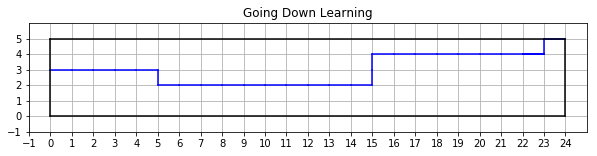

In [478]:
W, o_list = random_sidewalk(n, m)
path = Q_learning_godown(0, random.randint(0, m - 1), Q_godown)
plot_path_only(path)

In [531]:
# Stay in the sidewalk
def R_stay(s, a):
    R = np.zeros((s, a))
    for i in range(s):
        temp = i
        for j in range(a):
            dire = temp % 2 #right left down up
            if dire == 1 and j > 1:
                R[i][3 - j] -= 100
            else:
                if j == 0:
                    R[i][3 - j] += 3.5
                if j == 1:
                    R[i][3 - j] -= 2.5
            temp = int(temp / 2)
    return R

def get_state_stay(x, y):
    if y >= 4:
        up = 1
    else:
        up = 0
    if y <= 1:
        down = 1
    else:
        down = 0
    left = 0
    right = 0
    if y == 5 or y == 0:
        left = 1
        right = 1   
    return int(up * 8 + down * 4 + left * 2 + right)

def Q_learning_stay(init_x, init_y, Q):
    #randomly select an initial state among the whole map
    x = init_x
    y = init_y    
    s = get_state_stay(x, y)
    path = []
    for i in range(1000):
        x, y, s, path = Q_update_stay(x, y, s, path, Q)
        if x == 24:
            break
    #normalize the matrix Q
    Q = normalizeRows(Q)
    return path
        
def Q_update_stay(x, y, s, path, Q):
    if x == 24:
        return
    #using the epsilon-greedy strategy to pick an action a
    a_x, a_y, a = epsilon_greedy(x, y, s, Q)        

    #using action a to determine next state s’.
    sp = get_state_stay(a_x, a_y)

    #update Q value: Q(s,a) = (1 − α) * Q(s, a) + α * (R(x, y,a) + γ * max(Q(s′,:)));
    maxQp = -float("inf")
    for i in range(4):
        if Q[sp][i] > maxQp:
            maxQp = Q[sp][i]
    Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R[s][a] + gamma * maxQp)
    
    #set the next state as the current state.
    s = sp
    path.append([[x, y], [a_x, a_y]])
    return a_x, a_y, s, path

s = 2 * 2 * 2 * 2
a = 4
R = R_stay(s, a)
R_sta = R
Q_stay = np.zeros((s, a))

for episode in range(20000):
    x = random.randint(0, n - 2)#anywhere but the terminal
    y = random.randint(0, m - 1)
    W, o_list = random_sidewalk(n, m)
    Q_learning_stay(x, y, Q_stay)

In [607]:
print(R_sta)

[[   0.     0.    -2.5    3.5]
 [   0.     0.    -2.5    3.5]
 [   0.     0.    -2.5    3.5]
 [   0.     0.    -2.5    3.5]
 [   0.  -100.    -2.5    3.5]
 [   0.  -100.    -2.5    3.5]
 [   0.  -100.    -2.5    3.5]
 [   0.  -100.    -2.5    3.5]
 [-100.     0.    -2.5    3.5]
 [-100.     0.    -2.5    3.5]
 [-100.     0.    -2.5    3.5]
 [-100.     0.    -2.5    3.5]
 [-100.  -100.    -2.5    3.5]
 [-100.  -100.    -2.5    3.5]
 [-100.  -100.    -2.5    3.5]
 [-100.  -100.    -2.5    3.5]]


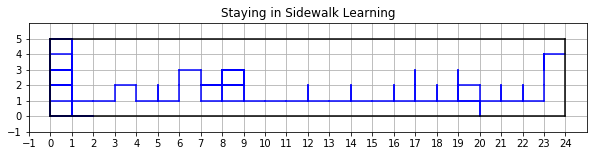

In [486]:
W, o_list = random_sidewalk(n, m)
path = Q_learning_stay(0, random.randint(0, m - 1), Q_stay)
plot_path_only(path)

In [506]:
#Combine the models

def combined_sidewalk(x, y):
    W = np.zeros((x, y))
    o_list = []
    l_list = []
    for i in range(1, x):
        for j in range(y):
            temp = random.randint(1, 5)
            if temp == 1:
                W[i][j] = 1
                o_list.append([i, j])
            elif temp == 2:
                W[i][j] = 2
                l_list.append([i, j])
    return W, o_list, l_list

def get_state_litter_2(x, y):
    if y == 5:
        up = 0
    else:
        up = int(W[x][y + 1] / 2)
    if y == 0:
        down = 0
    else:
        down = int(W[x][y - 1] / 2)
    if x == 0:
        left = 0
    else:
        left = int(W[x - 1][y] / 2)
    if x == 24:
        right = 0
    else:
        right = int(W[x + 1][y] / 2)
    
    return int(up * 8 + down * 4 + left * 2 + right)


s = 2 * 2 * 2 * 2
a = 4
Q_list = []
Q_list.append(Q_obstacle)
Q_list.append(Q_litter)
Q_list.append(Q_godown)
Q_list.append(Q_stay)



4

In [495]:
def epsilon_greedy_combined(x, y):
    if random.random() < epsilon:
        # randomly pick an a
        a_x, a_y, a = rand_helper(x, y)
        while a_x < 0 or a_x > n - 1 or a_y <0 or a_y > m - 1:
            a_x, a_y, a = rand_helper(x, y)
    else:
        maxQ = -float("inf")
        a_x = x
        a_y = y
        a = -1
        for i in range(4):
            temp_x = x + directions[i][0]
            temp_y = y + directions[i][1]
            if temp_x >= 0 and temp_x <= n - 1 and temp_y >= 0 and temp_y <= m - 1:
                #temp_Q = Q[s][i]
                temp_Q = average_Q(x, y, i)
                if maxQ < temp_Q:
                    maxQ = temp_Q
                    a_x = temp_x
                    a_y = temp_y
                    a = i
    return a_x, a_y, a

def average_Q(x, y, i):
    sumQ = 0
    s1 = get_state_obstacle(x, y)
    sumQ += Q_list[0][s1][i]
    s2 = get_state_litter_2(x, y)
    sumQ += Q_list[1][s2][i]
    s3 = get_state_godown(x, y)
    sumQ += Q_list[2][s3][i]
    s4 = get_state_stay(x, y)
    sumQ += Q_list[3][s4][i]
    
    return sumQ / 4
    

In [540]:
def Q_learning_combined(init_x, init_y, Q_list, W):
    #randomly select an initial state among the whole map
    x = init_x
    y = init_y    
    path = []
    for i in range(1000):
        #picking up
        if W[x][y] == 2:
            W[x][y] = 0
        x, y, path = Q_update_combined(x, y, path, Q_list) 
        #oldx = x
        #oldy = y
        #x, y, a = epsilon_greedy_combined(x, y)
        #path.append([[oldx, oldy], [x, y]])
        if x == 24:
            break
    #normalize the matrix Q
    #Q = normalizeRows(Q)
    return path

def Q_update_combined(x, y, path, Q_list):
    if x == 24:
        return
    #using the epsilon-greedy strategy to pick an action a
    a_x, a_y, a = epsilon_greedy_combined(x, y)        

    #1. obstacle
    s = get_state_obstacle(x, y)
    sp = get_state_obstacle(a_x, a_y)
    maxQp = -float("inf")
    for i in range(4):
        if Q_list[0][sp][i] > maxQp:
            maxQp = Q_list[0][sp][i]
    Q_list[0][s][a] = (1 - alpha) * Q_list[0][s][a] + alpha * (R_obstacle[s][a] + gamma * maxQp)

    #2. litter
    s = get_state_litter_2(x, y)
    sp = get_state_litter_2(a_x, a_y)
    maxQp = -float("inf")
    for i in range(4):
        if Q_list[1][sp][i] > maxQp:
            maxQp = Q_list[1][sp][i]
    Q_list[1][s][a] = (1 - alpha) * Q_list[1][s][a] + alpha * (R_lit[s][a] + gamma * maxQp)
    
    #3. Godown
    s = get_state_godown(x, y)
    sp = get_state_godown(a_x, a_y)
    maxQp = -float("inf")
    for i in range(4):
        if Q_list[2][sp][i] > maxQp:
            maxQp = Q_list[2][sp][i]
    Q_list[2][s][a] = (1 - alpha) * Q_list[2][s][a] + alpha * (R_god[s][a] + gamma * maxQp)
    
    #4. Stay
    s = get_state_stay(x, y)
    sp = get_state_stay(a_x, a_y)
    maxQp = -float("inf")
    for i in range(4):
        if Q_list[3][sp][i] > maxQp:
            maxQp = Q_list[3][sp][i]
    Q_list[3][s][a] = (1 - alpha) * Q_list[3][s][a] + alpha * (R_sta[s][a] + gamma * maxQp)
    
    path.append([[x, y], [a_x, a_y]])
    return a_x, a_y, path

In [518]:
def plot_combined(path):
    plt.figure(figsize = (10, 2))
    for i in o_list:
        plt.plot(i[0], i[1], 'ro')
    for i in l_list:
        plt.plot(i[0], i[1], 'go')
    for i in range(len(path)):
        p = path[i]
        plt.plot([p[0][0], p[1][0]], [p[0][1], p[1][1]], 'b-')
        #plt.scatter([p[0][0], p[1][0]], [p[0][1], p[1][1]], color='b', s = 10 )
    plt.axis([-1, n, -1, m])
    plt.xticks(np.arange(-1, n, 1))
    plt.yticks(np.arange(-1, m, 1))
    plt.plot(range(0, n), np.zeros(n), color='black')
    plt.plot(np.zeros(m), range(0, m), color='black')
    plt.plot(range(0, n), np.full(n, m - 1), color='black')
    plt.plot(np.full(m, n - 1), range(0, m), color='black')
    plt.grid(True)

    #plt.title("Obstacle-only Learning")
    plt.title("Combined Learning Models")
    plt.show()

In [587]:
for episode in range(200000):
    x = random.randint(0, n - 2)#anywhere but the terminal
    y = random.randint(0, m - 1)
    W, o_list, l_list = combined_sidewalk(n, m)
    Q_learning_combined(x, y, Q_list, W)

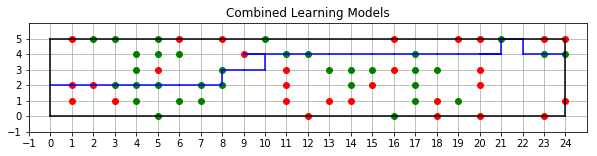

In [604]:
W, o_list, l_list = combined_sidewalk(n, m)
path = Q_learning_combined(0, random.randint(0, m - 1), Q_list, W)
plot_combined(path)